Created on 14.11.2024. - 2.2.2025. 
Predmet: Mašinsko učenje u astronomiji¶
Predmetni nastavnik: prof. dr Anđelka Kovačević
Student: Dragoljub Perišić

Cilj NoteBooka bio je kreiranje dva grafikon): prvi -  Histogram Asteroida u odnosu na orbitalni period i  druga- predstavljanje familija asteroida iz Glavnog pojasa asteroida, tako da budu verna reprodukcija slika iz knjige: Fundamental planetary science
   
Ulazni podaci preuzeti su sa sajta: https://minorplanetcenter.net/data. 
Ulazni podaci su pripremljenji za obradu pomoću 4 pomoćna programa (koji su navedeni na kraju notebooka). 
Iz skupa svih navedenih nebeskih tela odabrano je njih 136583.
Taj polazni skup od 1.4 miliona objekata bio je filtriran tri puta

Prvi put je bio tako filtriran (pomoću pomoćnog programa) da sadrži sve NEO objekte kao i oko 100000
non-NEO objekata
Druga filtracija u cilju dobijanja objekata za generisanje prve slike
dala je kao rezultat oko 99000 objekat. Pparametri za filtraciju su bili:   a < 6 i a > 1.6 i q>1.6
Treća filtracija je kao rezultat dala objekte sa inklinacijom manjom od 35 stepeni, a za potrebe drugog
grafikona.

### Klasa za putanjske elemente malog tela
1  Argument of Perihelion   -PEmaloomega   -degree
2  Ascending Node           -PEvelikoOmega -degree
3  Inclination              -PEi           -degree
4  Eccentricity             -PEe           -
5  Perihelion Distance      -PEq           -AU
6  Semimajor Axis           -PEa           -AU
7  Mean Anomaly             -PEM           -degree
8  Mean Daily Motion        -PEn           -degree/day   
9  Aphelion Distance        -PEQ           -AU
10 Period                   -PEP           -years
11 Absolute magnitude       -PEH           -mag


### definicija  SmallBody class

In [803]:
import copy

class SmallBody:
    def __init__(self, Desn, H, G, Epoch, M, Peri, Node, PEi, PEe, n, PEa, PEq, PEQ):
        self.Desn = Desn
        self.H = H
        self.G = G
        self.Epoch = Epoch
        self.M = M
####        self.Peri = Peri
        self.Node = Node
        self.PEi = PEi
        self.PEe = PEe
        self.n = n
        self.PEa = PEa
        self.PEq = PEq
        self.PEQ = PEQ
        self.Peri = PEa ** (3/2)
        
        
        
        
        

### funkcija koja učitava objekte smallbody u listu MyListOfSB

In [805]:
def loadSmallBodies(input_file):
    MyListOfSB = []
    try:
        with open(input_file, 'r') as infile:
            header = infile.readline()  # preskoči heder
            for line in infile:
                columns = line.split()
                if len(columns) >= 13:
                    try:
                        # kreira  SmallBody objekat
                        sb = SmallBody(
                            Desn=columns[0],
                            H=float(columns[1]),
                            G=float(columns[2]),
                            Epoch=columns[3],
                            M=float(columns[4]),
                            Peri=float(columns[5]),
                            Node=float(columns[6]),
                            PEi=float(columns[7]),
                            PEe=float(columns[8]),
                            n=float(columns[9]),
                            PEa=float(columns[10]),
                            PEq=float(columns[11]),
                            PEQ=float(columns[12])
                                                     
                        )
                        MyListOfSB.append(sb)
                    except ValueError:
                        continue  # Bitno : preskače  linije u slučaju loše konverzije u float
    except FileNotFoundError:
        print(f"Error: File {input_file} not found.")
    return MyListOfSB

## Glavni deo

In [807]:
input_file = "input136K.txt"

In [808]:
MyListOfSB = loadSmallBodies(input_file)

 ### kreiranje ovih lista nije neophodno ali je korisno za proveru koliko ima kojih objekata u svakoj od kategorija

### kreiranje 5 lista

In [811]:
MylistOfAmor = [copy.deepcopy(obj) for obj in MyListOfSB if 1.017 < float(obj.PEq) < 1.3]
MylistOfApollo = [copy.deepcopy(obj) for obj in MyListOfSB if float(obj.PEq) < 1.017 and float(obj.PEa) > 1]
MylistOfAtens = [copy.deepcopy(obj) for obj in MyListOfSB if float(obj.PEa) < 1 and float(obj.PEQ) > 0.983]
MylistOfApohele = [copy.deepcopy(obj) for obj in MyListOfSB if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]
MylistofNonNEO = [copy.deepcopy(obj) for obj in MyListOfSB if float(obj.PEq) > 1.3]

### brojanje objekata u listama

In [813]:
countAmor = len(MylistOfAmor)
countApollo = len(MylistOfApollo)
countAtens = len(MylistOfAtens)
countApohele = len(MylistOfApohele)
countNonNEO = len(MylistofNonNEO)

In [814]:
countPocetno=len(MyListOfSB)
countUkupno=countAmor+countApollo+countAtens+countApohele+countNonNEO

In [815]:
print(f"countAmor: {countAmor}")
print(f"countApollo: {countApollo}")
print(f"countAtens: {countAtens}")
print(f"countApohele: {countApohele}")
print(f"countNonNEO: {countNonNEO}")
print(f"Sum: {countAmor + countApollo + countAtens + countApohele + countNonNEO}")

countAmor: 13128
countApollo: 20905
countAtens: 2920
countApohele: 34
countNonNEO: 99596
Sum: 136583


## filtriranje - priprema za prvu sliku

In [817]:
MyListOfSB = [obj for obj in MyListOfSB if float(obj.PEa) < 6 and float(obj.PEa) > 1.6 and float(obj.PEq)>1.6]

In [818]:
countSBPosleFiltera = len(MyListOfSB)
print ('---------------------')
print(f"count SB Posle Filtera: {countSBPosleFiltera}")

---------------------
count SB Posle Filtera: 99127


### Histogram of Asteroids vs Orbital Period

In [820]:
import matplotlib.pyplot as plt300
import numpy as np

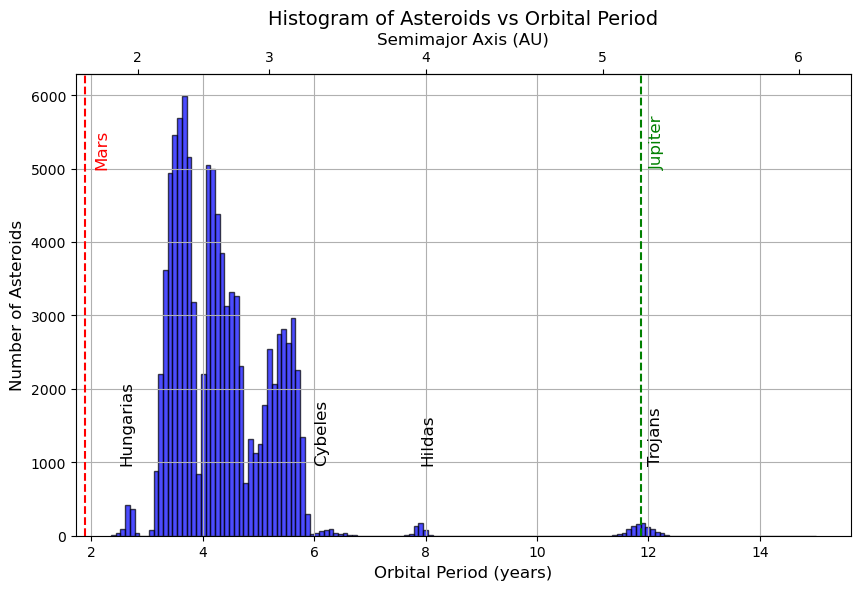

In [821]:
n_asteroids = len(MyListOfSB)
SMAxis = [float(obj.PEa) for obj in MyListOfSB if obj.PEa is not None]
MyPeriod = [float(obj.Peri) for obj in MyListOfSB if obj.Peri is not None]
### podešavanje veličine slike
fig, ax1 = plt300.subplots(figsize=(10, 6))
#bins = np.linspace(min(MyPeriod), max(MyPeriod), 300)
bins = np.linspace(min(MyPeriod), 15, 150)
ax1.hist(MyPeriod, bins=bins, color='blue', alpha=0.7, edgecolor='black')
ax1.set_xlabel("Orbital Period (years)", fontsize=12)
ax1.set_ylabel("Number of Asteroids", fontsize=12)
ax1.set_title("Histogram of Asteroids vs Orbital Period", fontsize=14)
ax1.set_xlabel("Orbital Period (years)", fontsize=12)
ax1.set_ylabel("Number of Asteroids", fontsize=12)
ax1.set_title("Histogram of Asteroids vs Orbital Period", fontsize=14)
### dodavanje druge ose gore - Velika poluosa (AU)
def period_to_semimajor_axis(period):
    """Convert orbital period to semimajor axis using Kepler's third law."""
    return period ** (2/3)
def semimajor_axis_to_period(semimajor_axis):
    """Convert semimajor axis to orbital period using Kepler's third law."""
    return semimajor_axis ** (3/2)
ax2 = ax1.secondary_xaxis("top", functions=(period_to_semimajor_axis, semimajor_axis_to_period))
ax2.set_xlabel("Semimajor Axis (AU)", fontsize=12)
plt300.text(2.5, 1000, 'Hungarias', rotation=90, fontsize = 12)
plt300.text(6, 1000, 'Cybeles', rotation=90, fontsize = 12)
plt300.text(7.9, 1000, 'Hildas', rotation=90, fontsize = 12)
plt300.text(12, 1000, 'Trojans', rotation=90, fontsize = 12)
### crtanje vertikalnih linija
ax1.axvline(x=1.88, color='red', linestyle='--')
ax1.text(1.88+0.3, max(ax1.get_ylim()) * 0.8, "Mars", color='red', fontsize=12, rotation=90, ha='center')
ax1.axvline(x=11.86, color='green', linestyle='--')
ax1.text(11.86+0.3, max(ax1.get_ylim()) * 0.8, "Jupiter", color='green', fontsize=12,rotation=90, ha='center')
plt300.grid(True)
plt300.show()

## filtriranje - priprema za drugu sliku

In [823]:
MyListOfSB = [obj for obj in MyListOfSB if float(obj.PEa) < 6 and float(obj.PEa) > 1.6 and float(obj.PEq)>1.6 and float(obj.PEi)<35]
countSBPosleFiltera = len(MyListOfSB)
print ('---------------------')
print(f"count SB Posle Filtera: {countSBPosleFiltera}")

---------------------
count SB Posle Filtera: 99089


### SemiMajor Axis vs inclination - MBA - asteroid families

In [825]:
import matplotlib.pyplot as plt300

liste u nizove

In [827]:
xs = [obj.PEa for obj in MyListOfSB if obj.PEa is not None]
resX = [float(ele) for ele in xs]
ys = [obj.PEi for obj in MyListOfSB if obj.PEi is not None]
resY = [float(ele) for ele in ys]

veća slika

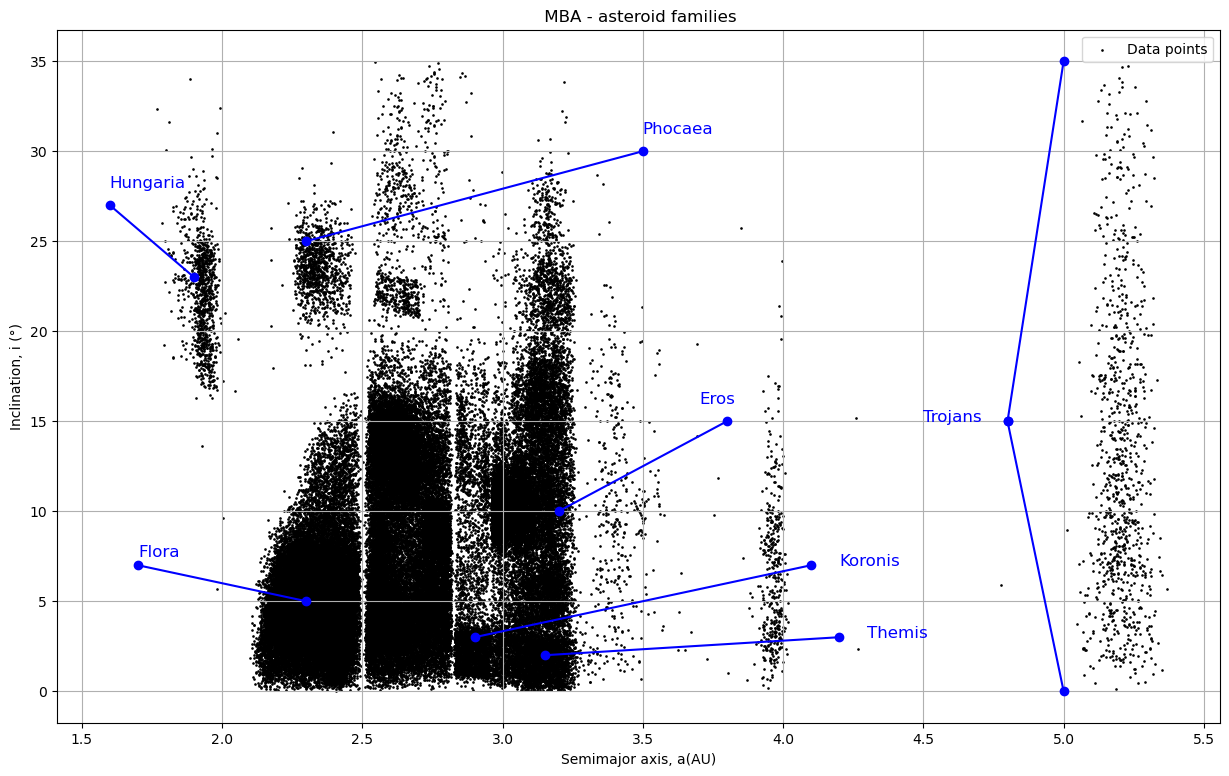

In [829]:
fig, ax = plt300.subplots(figsize=(15, 9))
plt300.xlabel("Semimajor axis, a(AU)")
plt300.ylabel("Inclination, i (°)")
plt300.title(" MBA - asteroid families")
### crtanje tačaka
plt300.scatter(resX, resY, s=0.8, color='black', label='Data points')
x = [1.7, 2.3]
y = [7, 5]
plt300.plot(x, y, marker='o', linestyle='-', color='b')
plt300.text(1.7, 7.5, 'Flora', fontsize = 12, color ='blue')
x = [1.6, 1.9]
y = [27, 23]
plt300.plot(x, y, marker='o', linestyle='-', color='b')
plt300.text(1.6, 28, 'Hungaria',  fontsize = 12, color ='blue')
x = [2.3, 3.5]
y = [25, 30]
plt300.plot(x, y, marker='o', linestyle='-', color='b')
plt300.text(3.5, 31, 'Phocaea', fontsize = 12, color ='blue')
x = [3.2, 3.8]
y = [10, 15]
plt300.plot(x, y, marker='o', linestyle='-', color='b')
plt300.text(3.7, 16, 'Eros', fontsize = 12, color ='blue')
x = [2.9, 4.1]
y = [3, 7]
plt300.plot(x, y, marker='o', linestyle='-', color='b')
plt300.text(4.2, 7, 'Koronis', fontsize = 12, color ='blue')
x = [3.15, 4.2]
y = [2, 3]
plt300.plot(x, y, marker='o', linestyle='-', color='b')
plt300.text(4.3, 3, 'Themis',  fontsize = 12, color ='blue')
x = [4.8, 5]
y = [15, 35]
plt300.plot(x, y, marker='o', linestyle='-', color='b')
x = [4.8, 5]
y = [15, 0]
plt300.plot(x, y, marker='o', linestyle='-', color='b')
plt300.text(4.5, 15, 'Trojans', fontsize = 12, color ='blue')
plt300.grid(True)
plt300.legend()
plt300.show()